<a href="https://colab.research.google.com/github/sternacht/csi_process/blob/master/ml_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


In [3]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
total = cifar10.load_data()
total

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
print(y_label_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [0]:
print("train data:", x_img_train.shape, y_label_train.shape)
print("test data:", x_img_test.shape, y_label_test.shape)

train data: (50000, 32, 32, 3) (50000, 1)
test data: (10000, 32, 32, 3) (10000, 1)


In [0]:
def show(x_img, y_label, i):
  print("label:",label_dict[y_label[i][0]],"\npredict:")
  plt.figure(figsize=(2,2))
  plt.imshow(x_img[i])
  plt.show()

label: bird 
predict:


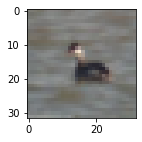

In [0]:
show(x_img_train,y_label_train,1500)

In [0]:
def show_new(x_img, i):
  plt.figure(figsize=(2,2))
  img_new = x_img[i].copy()
  img_new[:,:,0] = x_img[i][:,:,2]
  img_new[:,:,1] = x_img[i][:,:,0]
  img_new[:,:,2] = x_img[i][:,:,1]
  plt.imshow(img_new)
  plt.show

label: airplane 
predict:


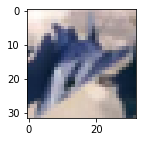

[0]


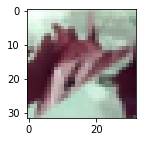

In [0]:
show(x_img_train,y_label_train,555)
print(y_label_train[555])
show_new(x_img_train,555)

In [0]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0
y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [0]:
y_label_test_onehot.shape

(10000, 10)

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(1024,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
train_history=model.fit(x_img_train_normalize[:128],
                        y_label_train_onehot[:128],
                        validation_split=0.2,
                        epochs=10,
                        batch_size=128,
                        verbose=0)

In [0]:
scores = model.evaluate(x_img_train_normalize[:128],
                        y_label_train_onehot[:128])
scores[1]

128/128 [==============================] - 0s 741us/step


1.0

In [0]:
scores

[0.015013460884802043, 1.0]